In [5]:
import pandas as pd


In [6]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.drop(columns=df[['ID']],inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.isnull().mean() * 100

Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

In [9]:
dum = pd.get_dummies(df['Education'])
dum
df = pd.concat([df,dum], axis=1)
df.drop(columns='Education')

df.rename(columns={ 1:'Undergrad',
                    2:'Graduate',
                    3: 'Advanced/Professional'}, inplace=True)

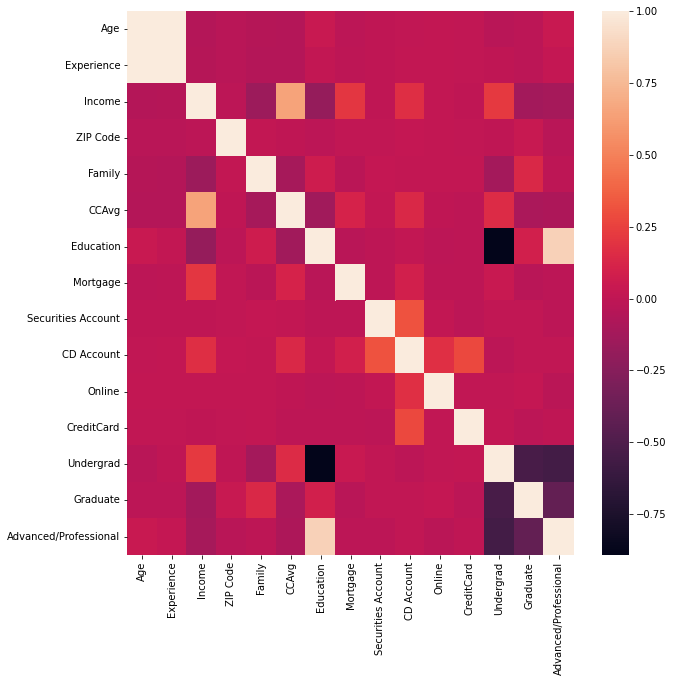

In [10]:
x = df.drop(columns=df[['Personal Loan']],inplace=False)
y = df['Personal Loan']
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
sns.heatmap(x.corr())
plt.show()
#Age and experience have high correlation

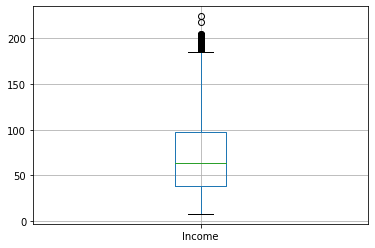

In [11]:
x.boxplot(column='Income')

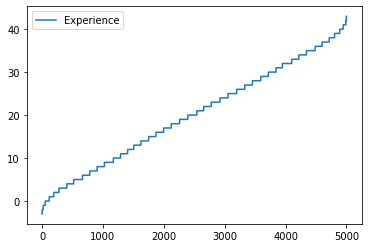

In [12]:
x_exp = x['Experience'].sort_values().reset_index()
x_exp = x_exp.drop(columns='index')
x_exp.plot()
#Experience have negative numbers (inconsistence)
#Drop experience because of the correlation and the inconsistence
x.drop(columns='Experience',inplace=True)


In [13]:
from sklearn.feature_selection import SelectKBest, chi2
algoritmos = SelectKBest(score_func=chi2, k=2)
dados_das_melhores_pred = algoritmos.fit_transform(x,y)


scores = pd.concat([pd.DataFrame(algoritmos.scores_),pd.DataFrame(x.columns)], axis=1)
print(scores)
#Zip code does not have influency on the result
x.drop(columns='ZIP Code',inplace=True)

               0                      0
0       0.864754                    Age
1   36252.494760                 Income
2       0.002786               ZIP Code
3      10.347204                 Family
4    1060.535962                  CCAvg
5      35.042209              Education
6   18482.585663               Mortgage
7       2.158275     Securities Account
8     470.177616             CD Account
9       0.079453                 Online
10      0.027705             CreditCard
11     64.380154              Undergrad
12     18.384223               Graduate
13     28.475495  Advanced/Professional


In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

skfold = StratifiedKFold(n_splits=10)
normalizador = MinMaxScaler(feature_range=(0,1))
xn = normalizador.fit_transform(x)

lg_regression = LogisticRegression()
knn = KNeighborsClassifier()
nb = MultinomialNB()
tree = DecisionTreeClassifier()

result_reg = cross_val_score(lg_regression,x,y,cv = skfold)
result_knn = cross_val_score(knn,xn,y,cv =skfold)
result_nb = cross_val_score(nb,x,y,cv =skfold)
result_tree = cross_val_score(tree,x,y,cv =skfold)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [15]:
print(result_reg.mean())
print(result_knn.mean())
print(result_nb.mean())
print(result_tree.mean())

0.9558
0.9603999999999999
0.7926
0.9823999999999999


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
#Decision Tree is the best model
tree = DecisionTreeClassifier()
min_split = np.array([2,3,4,5,6,7,8])
max_nivel = np.array([3,4,5,6])
algoritmo = ['gini', 'entropy']
valores_grid = {'min_samples_split': min_split,'max_depth':max_nivel, 'criterion':algoritmo}

gridDecisionTree = GridSearchCV(estimator = tree, param_grid = valores_grid,cv=5)
gridDecisionTree.fit(x_train,y_train)

min_samples_split = gridDecisionTree.best_estimator_.min_samples_split
max_depth = gridDecisionTree.best_estimator_.max_depth
criterion = gridDecisionTree.best_estimator_.criterion

tree = DecisionTreeClassifier(min_samples_split = min_samples_split, max_depth = max_depth, criterion = criterion)

In [21]:
predition = tree.fit(x_train, y_train)

In [22]:
print(predition.score(x_test,y_test))

0.9846666666666667
